# Table Content 
<li>Understand the data by(shape,histgrams,Boxplots,....)</li>
<li>Data cleaning </li>
<li>EDA</li>
<li>Modeling</li>
 

In [25]:
#first we will import important libraries which we will use in this Notebook
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [26]:
# read data 
test=pd.read_csv('test.csv',header=None)
train=pd.read_csv('train.csv',header=None)
trainlabel=pd.read_csv('trainLabels.csv',header=None)
plt.style.use('ggplot')

After we read data & import important librarries that we will you for Cleaning ,EDA &Modeling .we will move to the next step like Exploreing  the data to find if there is any missing values or outliers and try to find the best solution to handle this problem   

In [27]:
#print train data 
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [28]:
# print the shape of data 
print("We have {} observation & {} columns".format(train.shape[0],train.shape[1]))

We have 1000 observation & 40 columns


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [30]:
print('Number of missing values are = {} '.format(train.isnull().sum().sum()))

Number of missing values are = 0 


In [31]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


<AxesSubplot:>

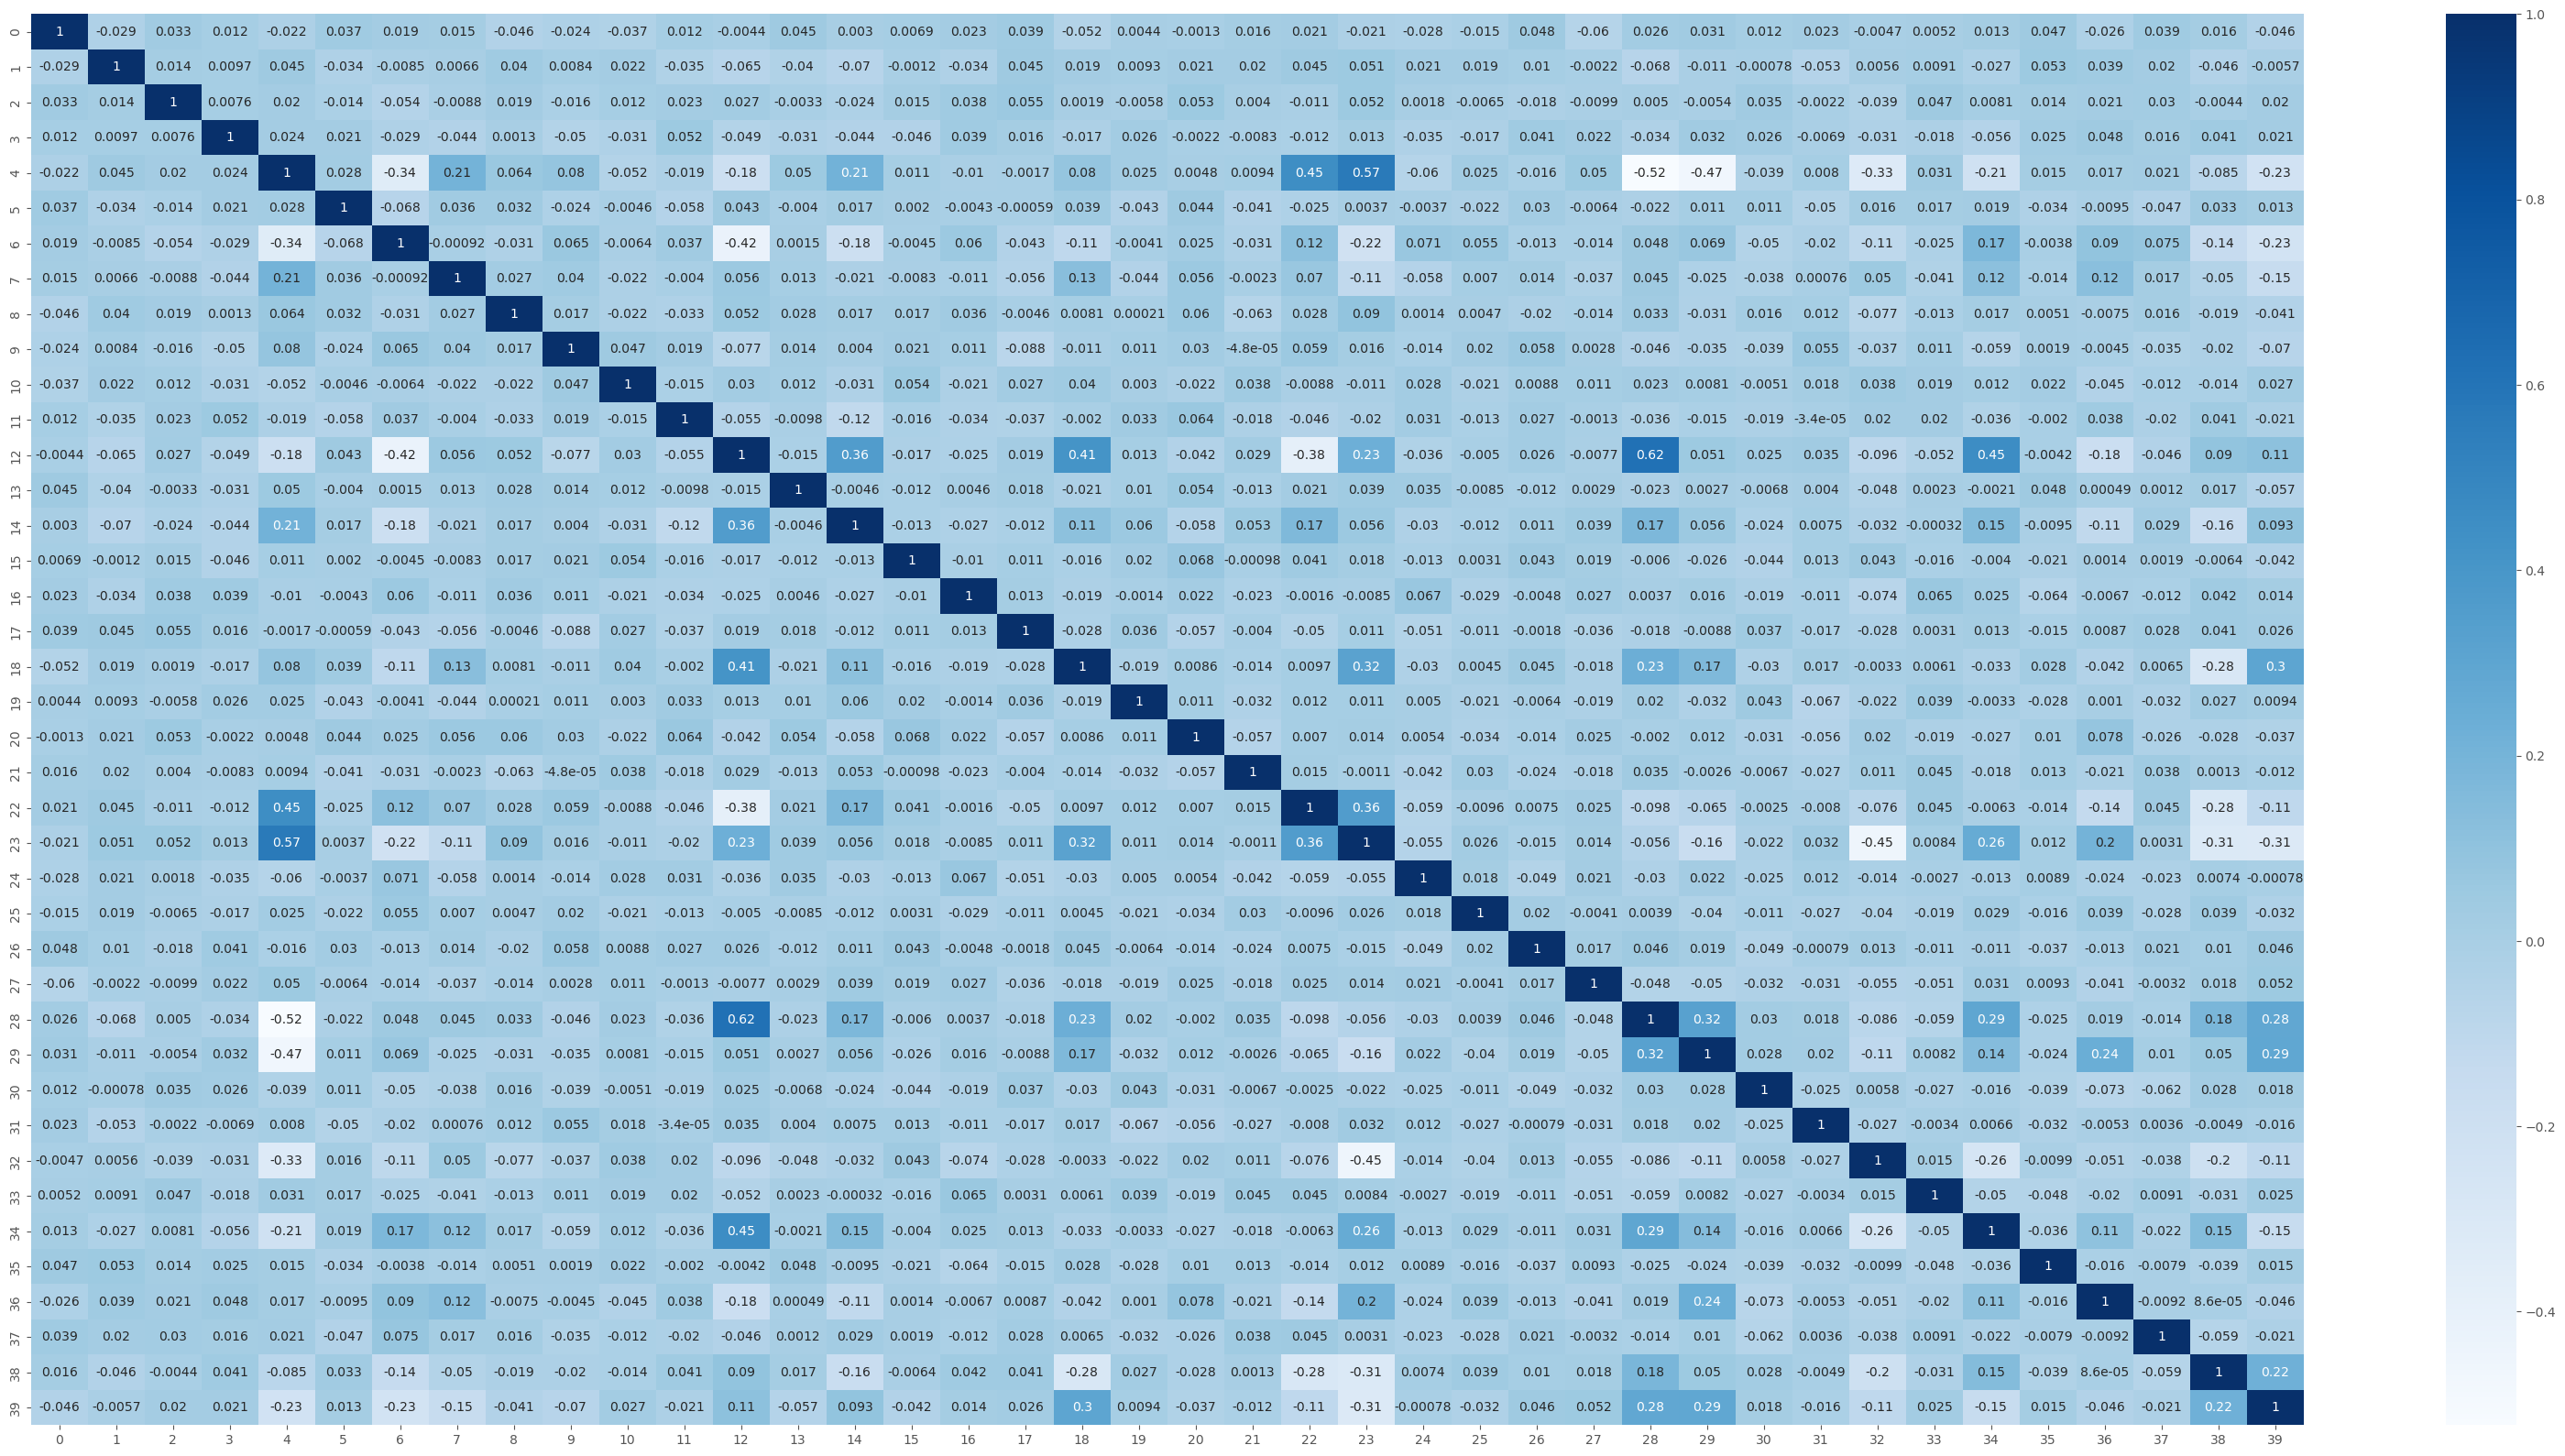

In [32]:
cor=train.corr()
plt.figure(figsize=(40,20))
sns.heatmap(cor, annot=True, cmap='Blues')

# Modeling 

In [33]:

X, y = train, np.ravel(trainlabel)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True,random_state=42)

In [34]:

from sklearn.model_selection import GridSearchCV
#define function to check all models that we will use 
all_model=[]
all_train=[]
all_test=[]
all_ac_sco=[]
def check(x_train,y_train,x_test,y_test,model,name):
    model.fit(x_train,y_train)
    train_sc=model.score(x_train,y_train)
    test_sc=model.score(x_test,y_test)
    ac_sco=accuracy_score(y_test, model.predict(x_test))
    all_model.append(name)
    all_train.append(train_sc)
    all_test.append(test_sc)
    all_ac_sco.append(ac_sco)
    set={'Model_name':[name],'train_sc':[train_sc],'test_sc':[test_sc],'ac_sco':[ac_sco]}
    df = pd.DataFrame(set)
    print(df)

 Logistic regression

In [35]:

#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet","None"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l2"], "solver":['liblinear','newton-cg'], 'class_weight':[{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 },{ 0:0.05, 1:0.95 }]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(logreg,grid,cv=15)




In [36]:

check(X_train,y_train,X_test,y_test,logreg_cv,"logistic regression")


            Model_name  train_sc  test_sc  ac_sco
0  logistic regression  0.825714     0.82    0.82


XGBClassifier

In [37]:
cxg = XGBClassifier()
xgbc0 =XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
default_params = {}
clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=4, cv=15)
check(X_train,y_train,X_test,y_test,clf0,"lXGBclassifier")

Fitting 15 folds for each of 1 candidates, totalling 15 fits
[CV 1/15] END .............., score=(train=1.000, test=0.872) total time=   0.1s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/15] END .............., score=(train=1.000, test=0.894) total time=   0.0s
[CV 3/15] END .............., score=(train=1.000, test=0.872) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/15] END .............., score=(train=1.000, test=0.894) total time=   0.0s
[CV 5/15] END .............., score=(train=1.000, test=0.936) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/15] END .............., score=(train=1.000, test=0.872) total time=   0.1s
[CV 7/15] END .............., score=(train=1.000, test=0.872) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/15] END .............., score=(train=1.000, test=0.830) total time=   0.0s
[CV 9/15] END .............., score=(train=1.000, test=0.915) total time=   0.1s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/15] END ............., score=(train=1.000, test=0.851) total time=   0.1s
[CV 11/15] END ............., score=(train=1.000, test=0.935) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 12/15] END ............., score=(train=1.000, test=0.891) total time=   0.0s
[CV 13/15] END ............., score=(train=1.000, test=0.870) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 14/15] END ............., score=(train=1.000, test=0.848) total time=   0.1s
[CV 15/15] END ............., score=(train=1.000, test=0.783) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


       Model_name  train_sc   test_sc    ac_sco
0  lXGBclassifier       1.0  0.863333  0.863333


RandomForestClassifier

In [38]:

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 15)
check(X_train,y_train,X_test,y_test,clf0,"Randomforest")

Fitting 15 folds for each of 1 candidates, totalling 15 fits
[CV 1/15] END .............., score=(train=1.000, test=0.872) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/15] END .............., score=(train=1.000, test=0.894) total time=   0.0s
[CV 3/15] END .............., score=(train=1.000, test=0.872) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/15] END .............., score=(train=1.000, test=0.894) total time=   0.1s
[CV 5/15] END .............., score=(train=1.000, test=0.936) total time=   0.1s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/15] END .............., score=(train=1.000, test=0.872) total time=   0.1s
[CV 7/15] END .............., score=(train=1.000, test=0.872) total time=   0.1s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/15] END .............., score=(train=1.000, test=0.830) total time=   0.1s
[CV 9/15] END .............., score=(train=1.000, test=0.915) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/15] END ............., score=(train=1.000, test=0.851) total time=   0.0s
[CV 11/15] END ............., score=(train=1.000, test=0.935) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 12/15] END ............., score=(train=1.000, test=0.891) total time=   0.0s
[CV 13/15] END ............., score=(train=1.000, test=0.870) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 14/15] END ............., score=(train=1.000, test=0.848) total time=   0.0s
[CV 15/15] END ............., score=(train=1.000, test=0.783) total time=   0.0s


c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\NV_User\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


     Model_name  train_sc   test_sc    ac_sco
0  Randomforest       1.0  0.863333  0.863333


RidgeClassifier

In [39]:
from sklearn.linear_model import RidgeClassifier
parameters = {'alpha':[1, 10]}
Rcl=RidgeClassifier()
Ridge_reg= GridSearchCV(Rcl, parameters,cv=15)
check(X_train,y_train,X_test,y_test,Ridge_reg,"RidgeClassifier")

        Model_name  train_sc  test_sc  ac_sco
0  RidgeClassifier  0.834286     0.83    0.83


KNeighborClassifier

In [40]:
# knn = KNeighborsClassifier()
# k_range = list(range(1, 31))
# param_grid = dict(n_neighbors=k_range)
# # defining parameter range
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# check(X_train,y_train,X_test,y_test,grid,"kNeighborClassification")
  

# conclusion

In [41]:
set=['Model_name','train_sc','test_sc','ac_sco']
data = {'Model_name':all_model, 'train_score': all_train,'test_score':all_test, 'accuracy_score': all_ac_sco}
df=pd.DataFrame(data)

In [42]:
df

,Model_name,train_score,test_score,accuracy_score
0,logistic regression,0.825714,0.820000,0.820000
1,lXGBclassifier,1.000000,0.863333,0.863333
2,Randomforest,1.000000,0.863333,0.863333
3,RidgeClassifier,0.834286,0.830000,0.830000


In [43]:
submission = pd.DataFrame(Ridge_reg.predict(test))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission.to_csv('submission.csv',index=False)

(9000, 1)
